c:\Users\M S I\miniconda3\envs\prak_kb\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Nilai terbaik dari n_neighbors: 1
Prediksi untuk data uji: [100 113 144 106 146 111 112   0 108 115 154 142 131 194 107 122  87 100
 145 169 111 162 112 154  94 148 140 138 137 158 109 167  91 197 146   0
 162 128 101 104 181 124 131  65 162 151  68 114  92  96 132 116 171 112
 124 103 136 150 108 137 101  95  95  96 183 155 133 123 125 186  85 129
 112 141 144 180 151 109 128 148  74  84 170 145 137  89 125  99  88 122
  95 107 114  79  99 119   0  97  89 105 143 139 108  99  94 123 124  97
 133 168 129 173 128 155 113  44 112 124 119  78 125 161  99  93  93 129
 124  67 106 116 156  73 126 115 190 165  87  57 105 124  91  87 123  83
 175  95 120 179 152 109  77 141 107  93 117  88 147  89 147  87 100 135
 166 137  95 139 124 102 181 158 106 104 104 107 109 155  95 129  91 154
  75 129  96 137 144  81 106 133  93  81 171 155 126 107 102  83  84 184
 117  93 179 136  95 167 125 157  74 187 144 108 111 128 102  81 136  82
 152  85 128  92 104  85  82 109  97 108  78 102  99 110 157 176 

c:\Users\M S I\miniconda3\envs\prak_kb\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


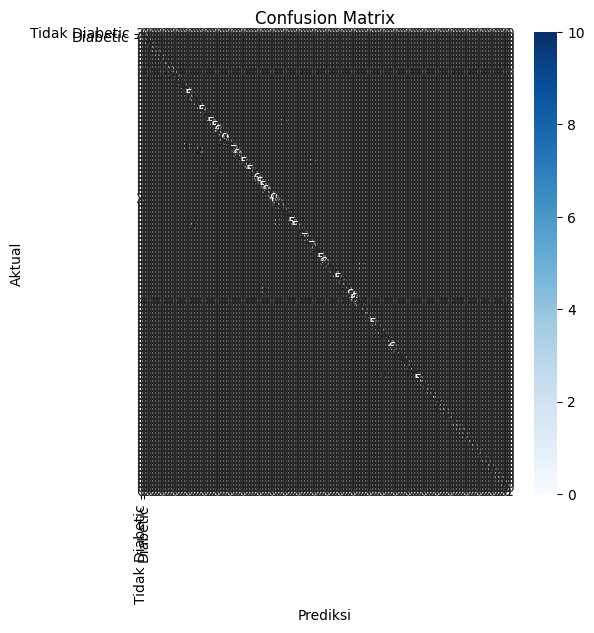

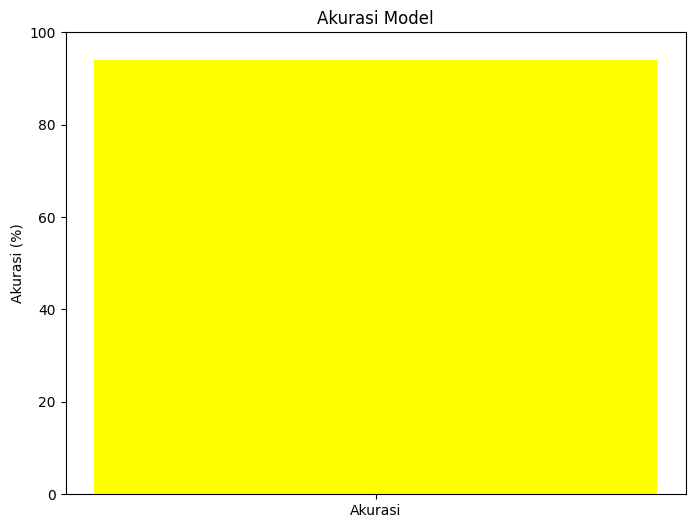

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

data = pd.read_csv("diabetes.csv")

x = data.drop("Glucose", axis=1) 
y = data["Glucose"] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Mencari nilai n_neighbors terbaik menggunakan GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Uji dengan nilai k antara 1 hingga 20
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Menampilkan nilai n_neighbors terbaik
best_k = grid_search.best_params_['n_neighbors']
print(f"Nilai terbaik dari n_neighbors: {best_k}")

# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


print("Prediksi untuk data uji:", y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

print("Classification Report:\n", classification_report(y_test, y_pred))

new_data = [[2, 138, 62, 35, 0, 33.6, 0.127, 47]]
new_data_scaled = sc.transform(new_data)
predicted = knn.predict(new_data_scaled)
print("Prediksi untuk data baru:", predicted)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Diabetic", "Diabetic"], yticklabels=["Tidak Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Plot Distribusi Akurasi
plt.figure(figsize=(8, 6))
plt.bar(['Akurasi'], [accuracy * 100], color='yellow')
plt.title("Akurasi Model")
plt.ylabel("Akurasi (%)")
plt.ylim(0, 100)
plt.show()
